In [1]:
import tensorflow.keras as keras
keras.__version__

'2.8.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from getpass import getpass
import os
user = 'mohamedantargad'
key = 'b4b6784f7fa24d1f5fd2a1db3d4959ac'

if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c State-Farm-Distracted-Driver-Detection

100% 4.00G/4.00G [01:30<00:00, 60.2MB/s]
100% 4.00G/4.00G [01:30<00:00, 47.5MB/s]


visualizing the data

In [7]:
!unzip State-Farm-Distracted-Driver-Detection.zip 

Archive:  State-Farm-Distracted-Driver-Detection.zip
caution: filename not matched:  Notebooks/deep
caution: filename not matched:  learning/final
caution: filename not matched:  project/data


In [22]:
train_path = '/content/imgs/train'
fclasses = [os.path.join(train_path, fname) for fname in os.listdir(train_path)]
fimages = [os.path.join(fclass , img)  for fclass in fclasses for img in os.listdir(fclass)]
print( 'number of images in train is ' , len(fimages) )



number of images in train is  22424


In [80]:
class_mapping = {'c0': 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the phone - right',
'c3': 'texting - left',
'c4': 'talking on the phone - left',
'c5': 'operating the radio',
'c6': 'drinking',
'c7':' reaching behind',
'c8': 'hair and makeup',
'c9': 'talking to passenger'}

class_mapping['c1']

'texting - right'

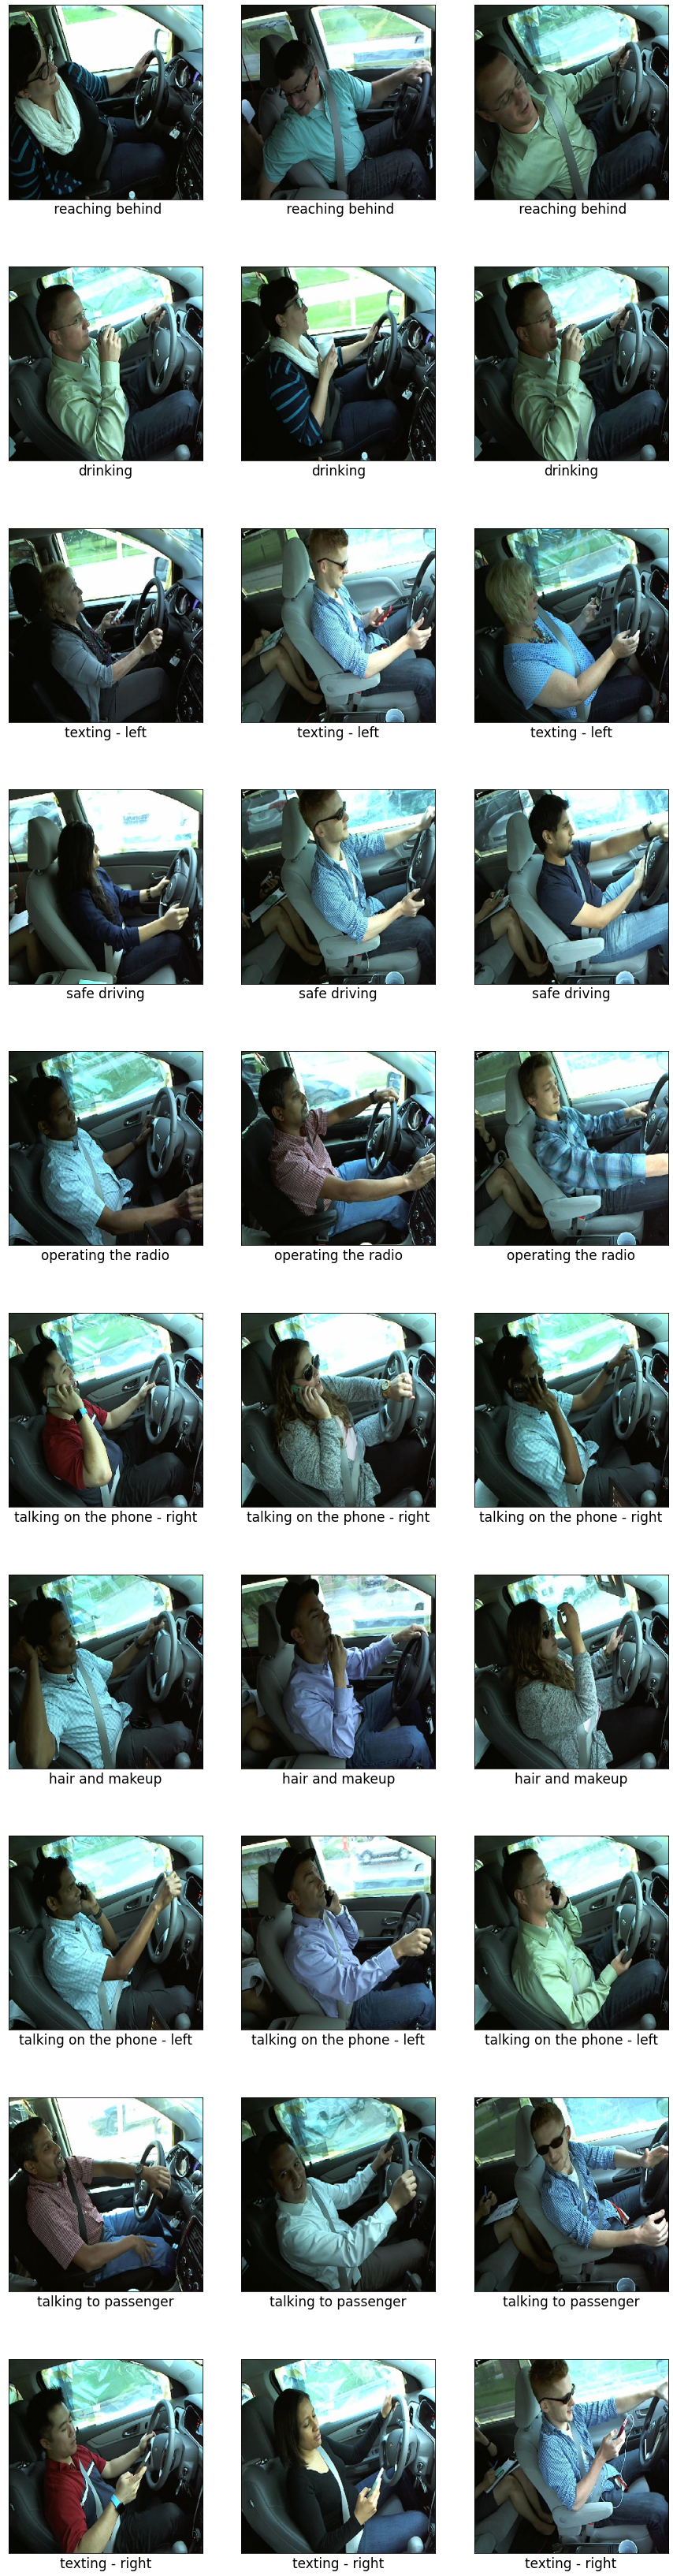

In [95]:
from IPython.core.pylabtools import figsize
TRAIN_PATH = '/content/imgs/train'
plt.figure(figsize=(15,60))

j=1
CLASSES = os.listdir(TRAIN_PATH)

for fclass in  CLASSES:
  CLASS_PATH = os.path.join(TRAIN_PATH , fclass)
  i=0
  IMGS = os.listdir(os.path.join(TRAIN_PATH, fclass) )

  for img_name in IMGS[50:]:
    img_path = os.path.join(CLASS_PATH , img_name)
    img = image.load_img(img_path, target_size=(300, 300))
    img = image.array_to_img(img)

    plt.subplot(10,3,j)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.xlabel(str(class_mapping[fclass]), fontsize=17)
    j+=1
    if i>=2:
      break
    i+=1


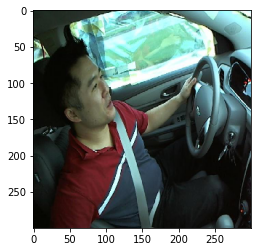

In [66]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = fimages[34]
img = image.load_img(img_path, target_size=(300, 300))
plt.imshow(image.array_to_img( img) )

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = '/content/imgs/train'
TEST_DIR = '/content/imgs/test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        TRAIN_DIR,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 22424 images belonging to 10 classes.
Found 0 images belonging to 0 classes.


In [91]:
classes_lengthes = [len(os.listdir(fclass)) for fclass in fclasses]
classes = [class_mapping[fclass] for fclass in class_mapping.keys()]
import plotly.express as px
px.bar(x = classes , y = classes_lengthes)

In [87]:
fclasses

['/content/imgs/train/c7',
 '/content/imgs/train/c6',
 '/content/imgs/train/c3',
 '/content/imgs/train/c0',
 '/content/imgs/train/c5',
 '/content/imgs/train/c2',
 '/content/imgs/train/c8',
 '/content/imgs/train/c4',
 '/content/imgs/train/c9',
 '/content/imgs/train/c1']